In [144]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import matplotlib.animation as animation

In [145]:
if not os.path.exists("plots"):
    os.mkdir("plots")

In [146]:
log_file = "2023-09-10_18-14-33"

agp_df = pd.read_csv(f"logs/{log_file}/agp_data.csv", index_col=0)
cars_df = pd.read_csv(f"logs/{log_file}/cars_data.csv", index_col=0)
exits_df = pd.read_csv(f"logs/{log_file}/exits_data.csv", index_col=0)

In [147]:
agp_df.head()

,frame,current_car_count,historic_car_count,current_crash_count,historic_crash_count,avg_v,avg_a,avg_t_d
0,0.0,2.0,2.0,0.0,0.0,18.232688,2.562109,0.0
1,1.0,2.0,2.0,0.0,0.0,20.278067,2.540484,0.0
2,2.0,2.0,2.0,0.0,0.0,21.701010,2.538188,0.0
3,3.0,2.0,2.0,0.0,0.0,23.035056,2.537205,0.0
4,4.0,3.0,3.0,0.0,0.0,24.339453,2.536658,0.0


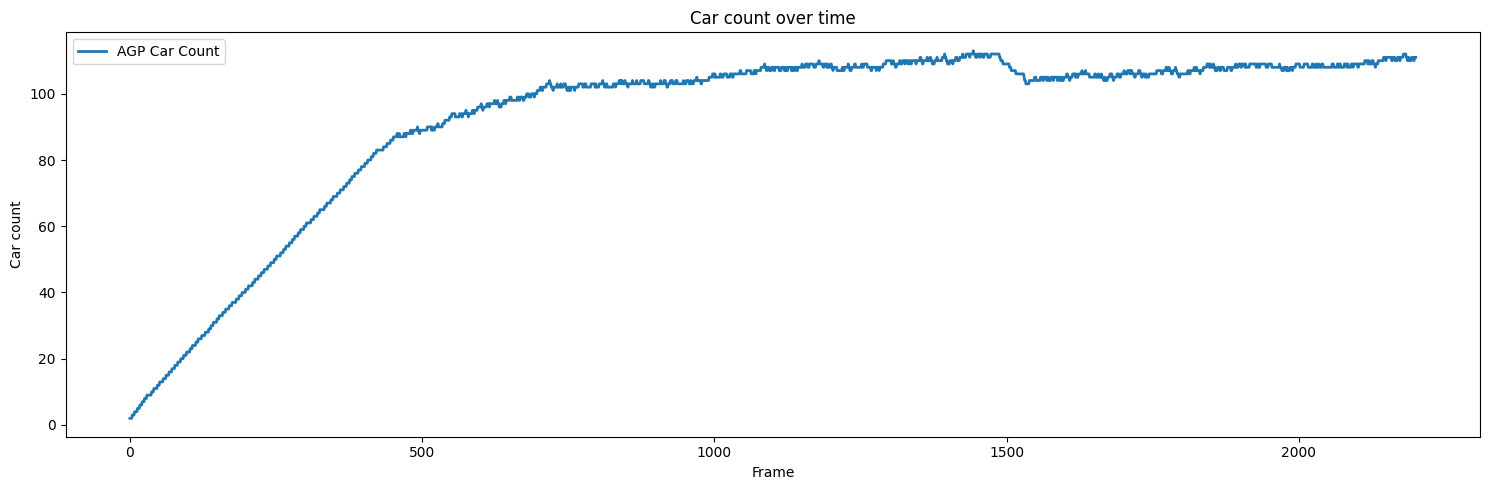

In [148]:
fig, ax = plt.subplots(figsize=(15, 5))

agp_df.groupby('frame')['current_car_count'].mean().plot(ax=ax, label='AGP Car Count', linewidth=2)

ax.set_xlabel('Frame')
ax.set_ylabel('Car count')
ax.set_title('Car count over time')

plt.legend()

fig.tight_layout()

# Transparent background

fig.patch.set_alpha(0)

plt.savefig(f"plots/car_count.png", transparent=True)

In [149]:
cars_df.sample(10)

,frame,car_id,car_x,car_v,car_a,car_t_d,f_car_id,b_car_id
79660,1046.0,859628.0,12623.645945,30.277778,2.593494,585.0,616222.0,169392.0
88199,1126.0,525796.0,6992.060055,25.401581,-3.269626,376.0,955985.0,238694.0
32489,583.0,940222.0,10571.405421,26.611646,-3.561377,440.0,966755.0,156746.0
83471,1082.0,919034.0,8446.508574,19.584109,-4.379106,427.0,132154.0,116673.0
150678,1705.0,807745.0,3764.606592,20.948567,2.067426,292.0,235993.0,477773.0
2638,152.0,485171.0,2028.741460,23.888601,-2.893635,95.0,865788.0,925811.0
76141,1013.0,514144.0,8458.132366,22.422583,-3.287452,418.0,875560.0,868018.0
67482,930.0,919034.0,4750.443175,23.226400,2.886637,275.0,132154.0,116673.0
14534,376.0,421909.0,12305.166185,32.500000,2.562109,377.0,-1.0,555889.0
152606,1723.0,475903.0,6336.504890,23.718934,2.370910,385.0,19150.0,879720.0


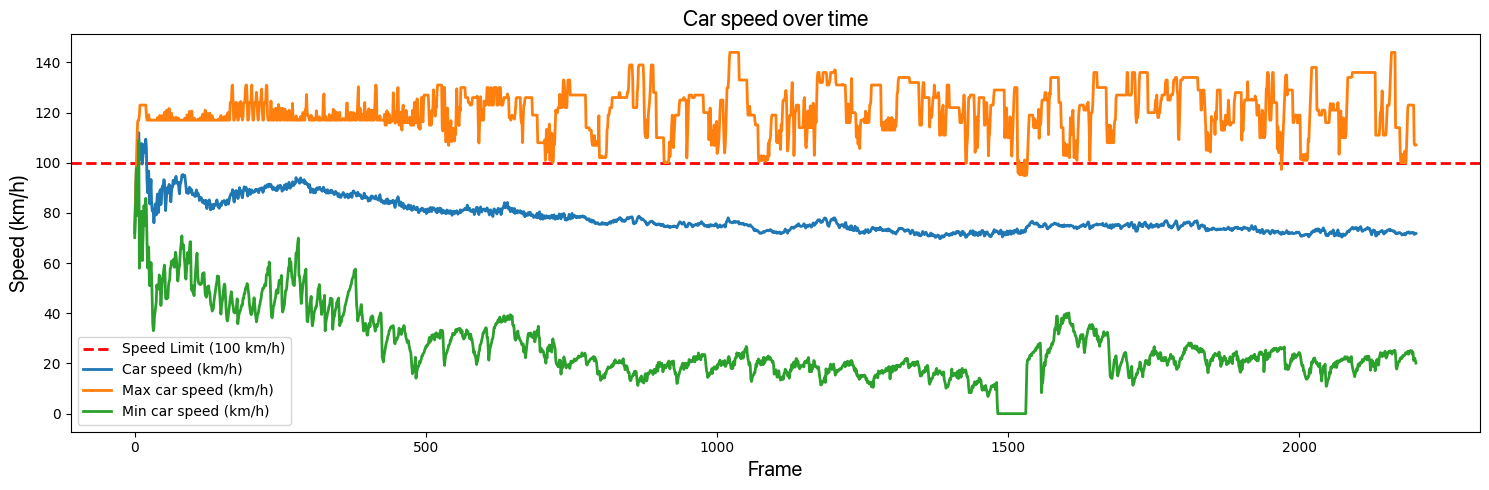

In [150]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot line at y=100
ax.axhline(100, color='r', linestyle='--', label='Speed Limit (100 km/h)', linewidth=2)

cars_df.groupby('frame')['car_v'].mean().apply(lambda x: x*3.6).plot(ax=ax, label='Car speed (km/h)', linewidth=2)

# Plot max car_v for each frame
cars_df.groupby('frame')['car_v'].max().apply(lambda x: x*3.6).plot(ax=ax, label='Max car speed (km/h)', linewidth=2)

# Plot min car_v for each frame
cars_df.groupby('frame')['car_v'].min().apply(lambda x: x*3.6).plot(ax=ax, label='Min car speed (km/h)', linewidth=2)

ax.set_xlabel('Frame', font="SF Pro Display", fontsize=15)
ax.set_ylabel('Speed (km/h)', font="SF Pro Display", fontsize=15)

ax.legend()

ax.set_title('Car speed over time', font="SF Pro Display", fontsize=16)

fig.tight_layout()

# Transparent background

fig.patch.set_alpha(0)

fig.savefig('plots/car_speed_over_time.png', dpi=300, transparent=True)

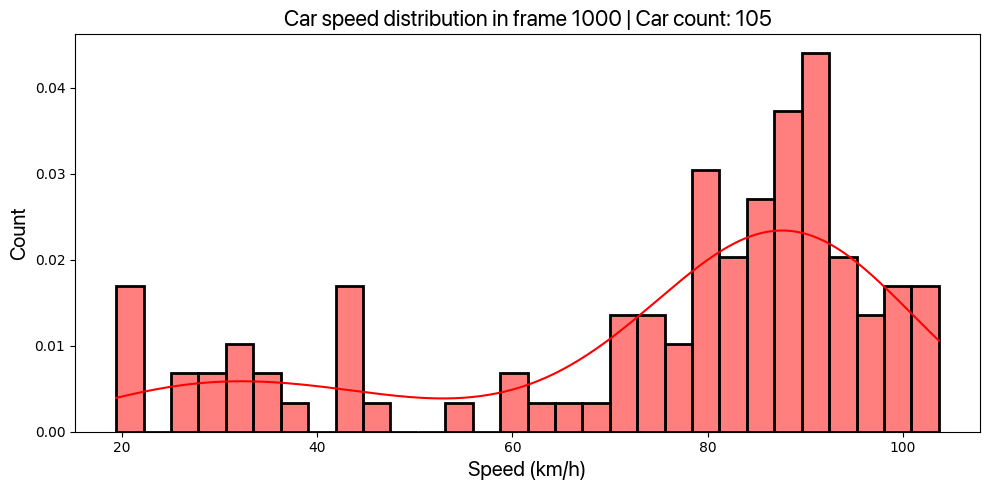

In [151]:
# Plot speed distribution in a given frame

frame = 1000

fig, ax = plt.subplots(figsize=(10, 5))

car_count = int(agp_df[agp_df['frame'] == frame]['current_car_count'].values[0])

sns.histplot(cars_df[cars_df['frame'] == frame]['car_v'].apply(lambda x: x*3.6), ax=ax, bins=30, kde=True, stat='density', color='red', linewidth=2)

ax.set_xlabel('Speed (km/h)', font="SF Pro Display", fontsize=15)
ax.set_ylabel('Count', font="SF Pro Display", fontsize=15)

ax.set_title(f'Car speed distribution in frame {frame} | Car count: {car_count}', font="SF Pro Display", fontsize=16)

fig.tight_layout()

# Transparent background

fig.patch.set_alpha(0)

fig.savefig('plots/car_speed_distribution.png', dpi=300, transparent=True)

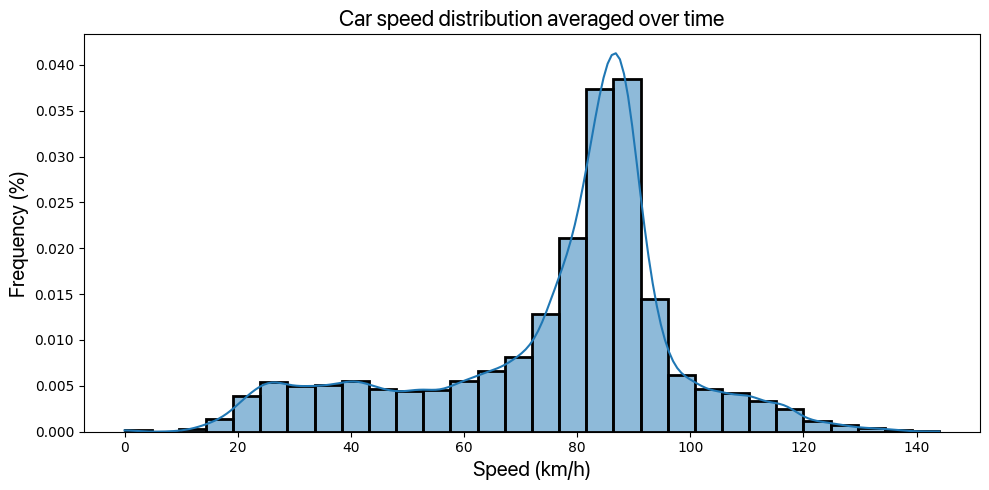

In [152]:
# Plot speed distributions averaged over time

fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(cars_df['car_v'].apply(lambda x: x*3.6), ax=ax, bins=30, kde=True, stat='density', linewidth=2)


ax.set_xlabel('Speed (km/h)', font="SF Pro Display", fontsize=15)
ax.set_ylabel('Frequency (%)', font="SF Pro Display", fontsize=15)

ax.set_title(f'Car speed distribution averaged over time', font="SF Pro Display", fontsize=16)

fig.tight_layout()

# Transparent background

fig.patch.set_alpha(0)

fig.savefig('plots/car_speed_distribution_averaged.png', dpi=300, transparent=True)

In [153]:
""" # Animate car speed distribution over time

fig, ax = plt.subplots(figsize=(10, 5))

def animate(i):
    ax.clear()

    car_count = int(agp_df[agp_df['frame'] == i]['current_car_count'].values[0])

    sns.histplot(cars_df[cars_df['frame'] == i]['car_v'].apply(lambda x: x*3.6), ax=ax, bins=30, kde=True, stat='density', color='red', linewidth=2)
    ax.set_xlabel('Speed (km/h)', font="SF Pro Display", fontsize=15)
    ax.set_ylabel('Count', font="SF Pro Display", fontsize=15)
    ax.set_title(f'Car speed distribution in frame {i} | Car count: {car_count}', font="SF Pro Display", fontsize=16)
    fig.tight_layout()
    fig.patch.set_alpha(0)

ani = animation.FuncAnimation(fig, animate, frames=range(0, len(cars_df['frame'].unique()), 1), interval=1000)

ani.save('plots/car_speed_distribution.gif', writer='imagemagick', fps=10) """

' # Animate car speed distribution over time\n\nfig, ax = plt.subplots(figsize=(10, 5))\n\ndef animate(i):\n    ax.clear()\n\n    car_count = int(agp_df[agp_df[\'frame\'] == i][\'current_car_count\'].values[0])\n\n    sns.histplot(cars_df[cars_df[\'frame\'] == i][\'car_v\'].apply(lambda x: x*3.6), ax=ax, bins=30, kde=True, stat=\'density\', color=\'red\', linewidth=2)\n    ax.set_xlabel(\'Speed (km/h)\', font="SF Pro Display", fontsize=15)\n    ax.set_ylabel(\'Count\', font="SF Pro Display", fontsize=15)\n    ax.set_title(f\'Car speed distribution in frame {i} | Car count: {car_count}\', font="SF Pro Display", fontsize=16)\n    fig.tight_layout()\n    fig.patch.set_alpha(0)\n\nani = animation.FuncAnimation(fig, animate, frames=range(0, len(cars_df[\'frame\'].unique()), 1), interval=1000)\n\nani.save(\'plots/car_speed_distribution.gif\', writer=\'imagemagick\', fps=10) '

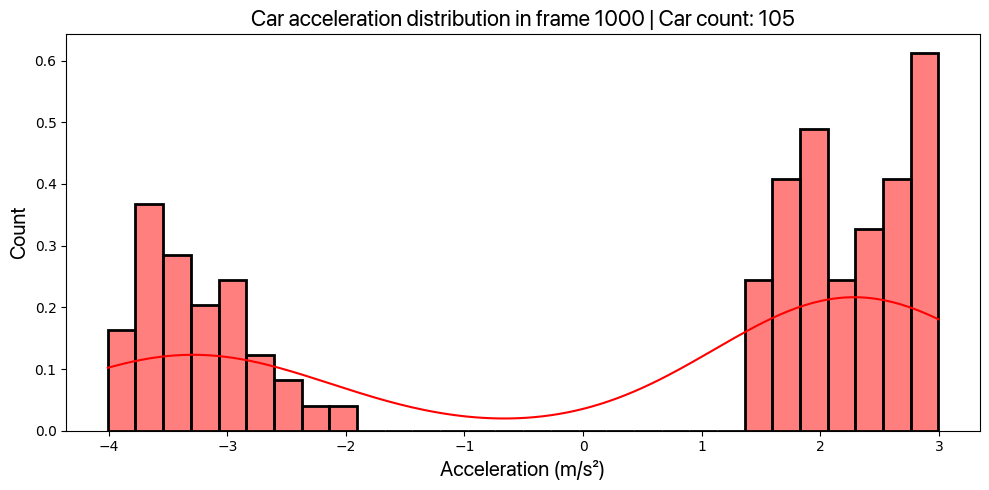

In [154]:
# Plot acceleration distribution in a given frame

frame = 1000

fig, ax = plt.subplots(figsize=(10, 5))

car_count = int(agp_df[agp_df['frame'] == frame]['current_car_count'].values[0])

sns.histplot(cars_df[cars_df['frame'] == frame]['car_a'], ax=ax, bins=30, kde=True, stat='density', color='red', linewidth=2)

ax.set_xlabel('Acceleration (m/s²)', font="SF Pro Display", fontsize=15)
ax.set_ylabel('Count', font="SF Pro Display", fontsize=15)

ax.set_title(f'Car acceleration distribution in frame {frame} | Car count: {car_count}', font="SF Pro Display", fontsize=16)

fig.tight_layout()

# Transparent background

fig.patch.set_alpha(0)

fig.savefig('plots/car_acceleration_distribution.png', dpi=300, transparent=True)

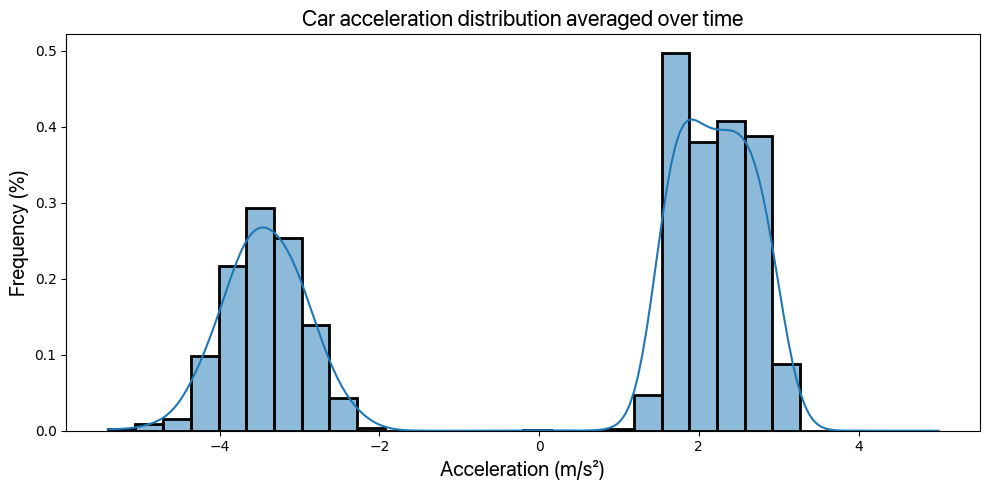

In [155]:
# Plot acceleration distributions averaged over time

fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(cars_df['car_a'], ax=ax, bins=30, kde=True, stat='density', linewidth=2)

ax.set_xlabel('Acceleration (m/s²)', font="SF Pro Display", fontsize=15)
ax.set_ylabel('Frequency (%)', font="SF Pro Display", fontsize=15)

ax.set_title(f'Car acceleration distribution averaged over time', font="SF Pro Display", fontsize=16)

fig.tight_layout()

# Transparent background

fig.patch.set_alpha(0)

fig.savefig('plots/car_acceleration_distribution_averaged.png', dpi=300, transparent=True)

In [156]:
cars_df.head()

,frame,car_id,car_x,car_v,car_a,car_t_d,f_car_id,b_car_id
0,0.0,555889.0,0.000000,20.555556,2.000000,0.0,421909.0,-1.0
1,0.0,421909.0,118.207123,19.500932,2.562109,1.0,-1.0,555889.0
2,1.0,555889.0,21.781792,23.047716,2.507382,1.0,421909.0,-1.0
3,1.0,421909.0,138.976300,22.063041,2.562109,2.0,-1.0,555889.0
4,2.0,555889.0,46.070662,25.555097,2.507382,2.0,421909.0,-1.0


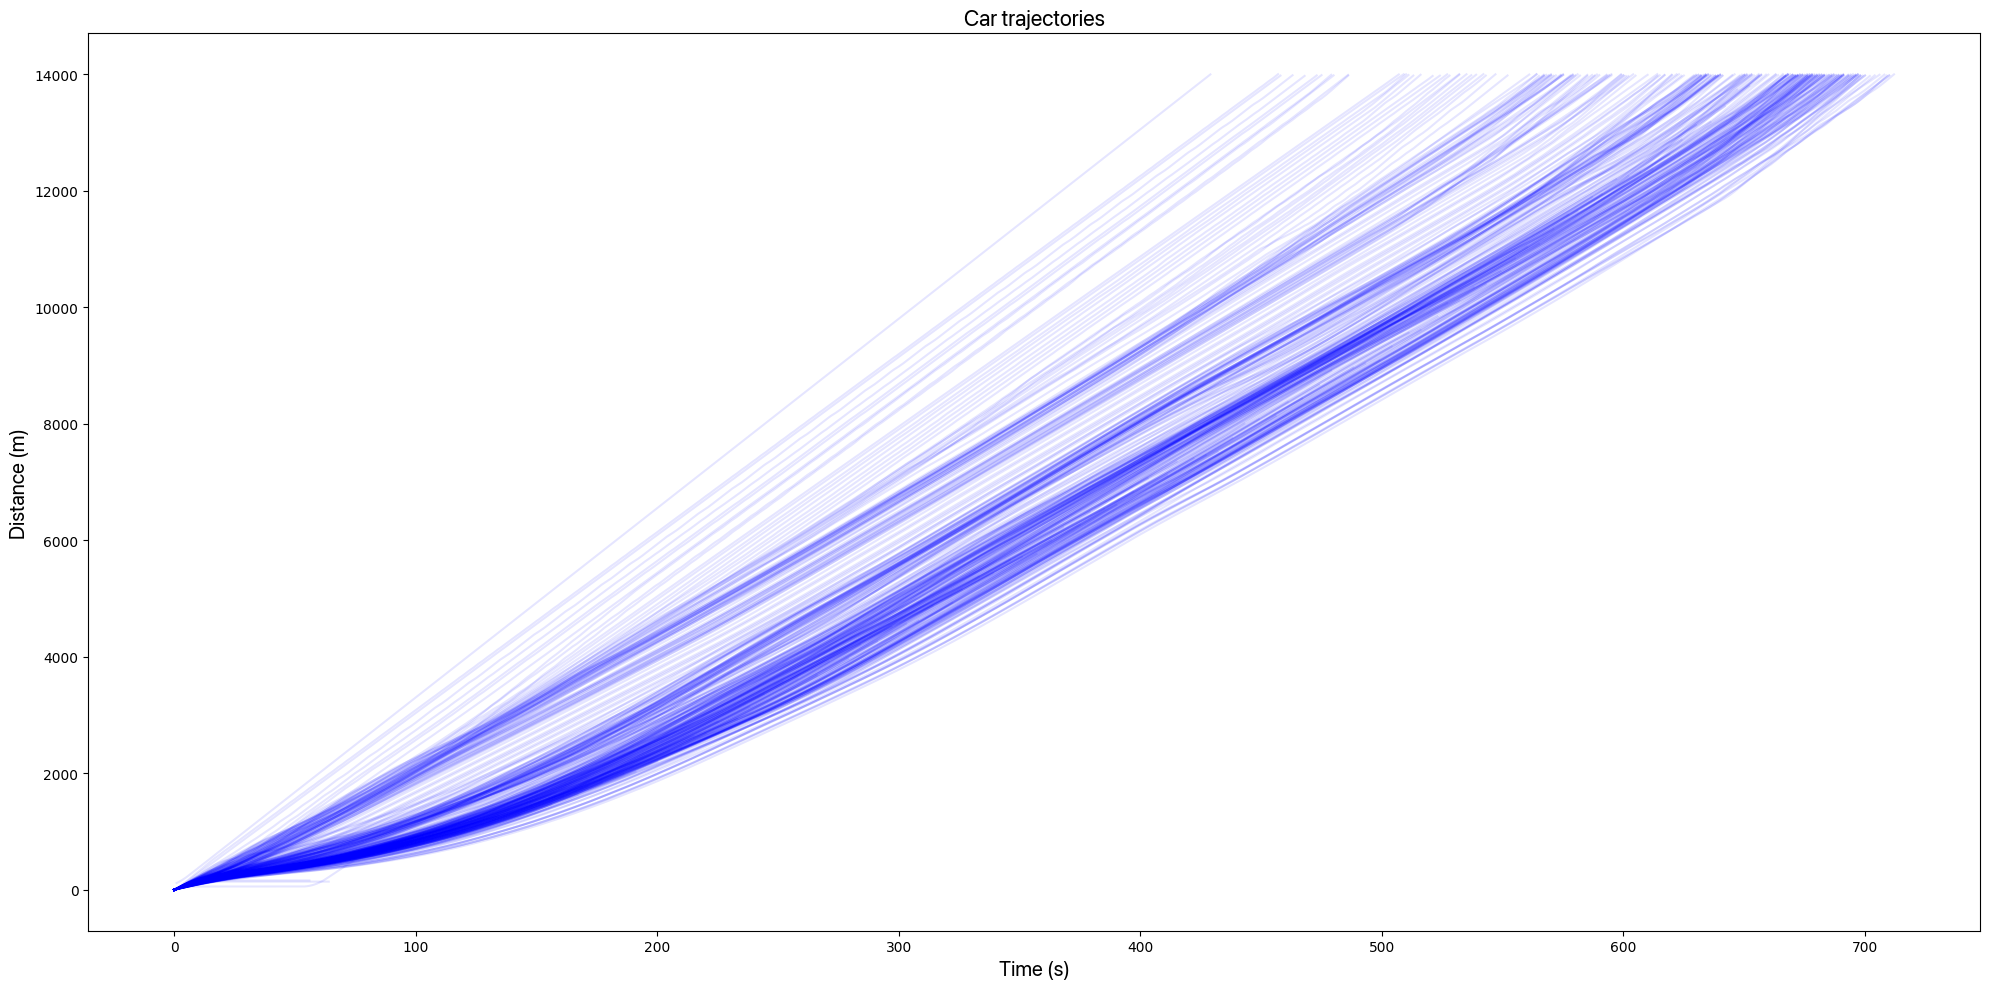

In [157]:
# Plot all car trajectories

fig, ax = plt.subplots(figsize=(20, 10))

#sns.scatterplot(data=cars_df, x='car_t_d', y='car_x', hue='car_id', ax=ax, s=10, color='blue')

cars_df.groupby('car_id').plot(x='car_t_d', y='car_x', ax=ax, legend=False, alpha=0.1, color='blue')

ax.set_xlabel('Time (s)', font="SF Pro Display", fontsize=15)
ax.set_ylabel('Distance (m)', font="SF Pro Display", fontsize=15)

ax.set_title(f'Car trajectories', font="SF Pro Display", fontsize=16)

fig.tight_layout()

# Transparent background
fig.patch.set_alpha(0)

fig.savefig('plots/car_trajectories_relative.png', dpi=300, transparent=True)

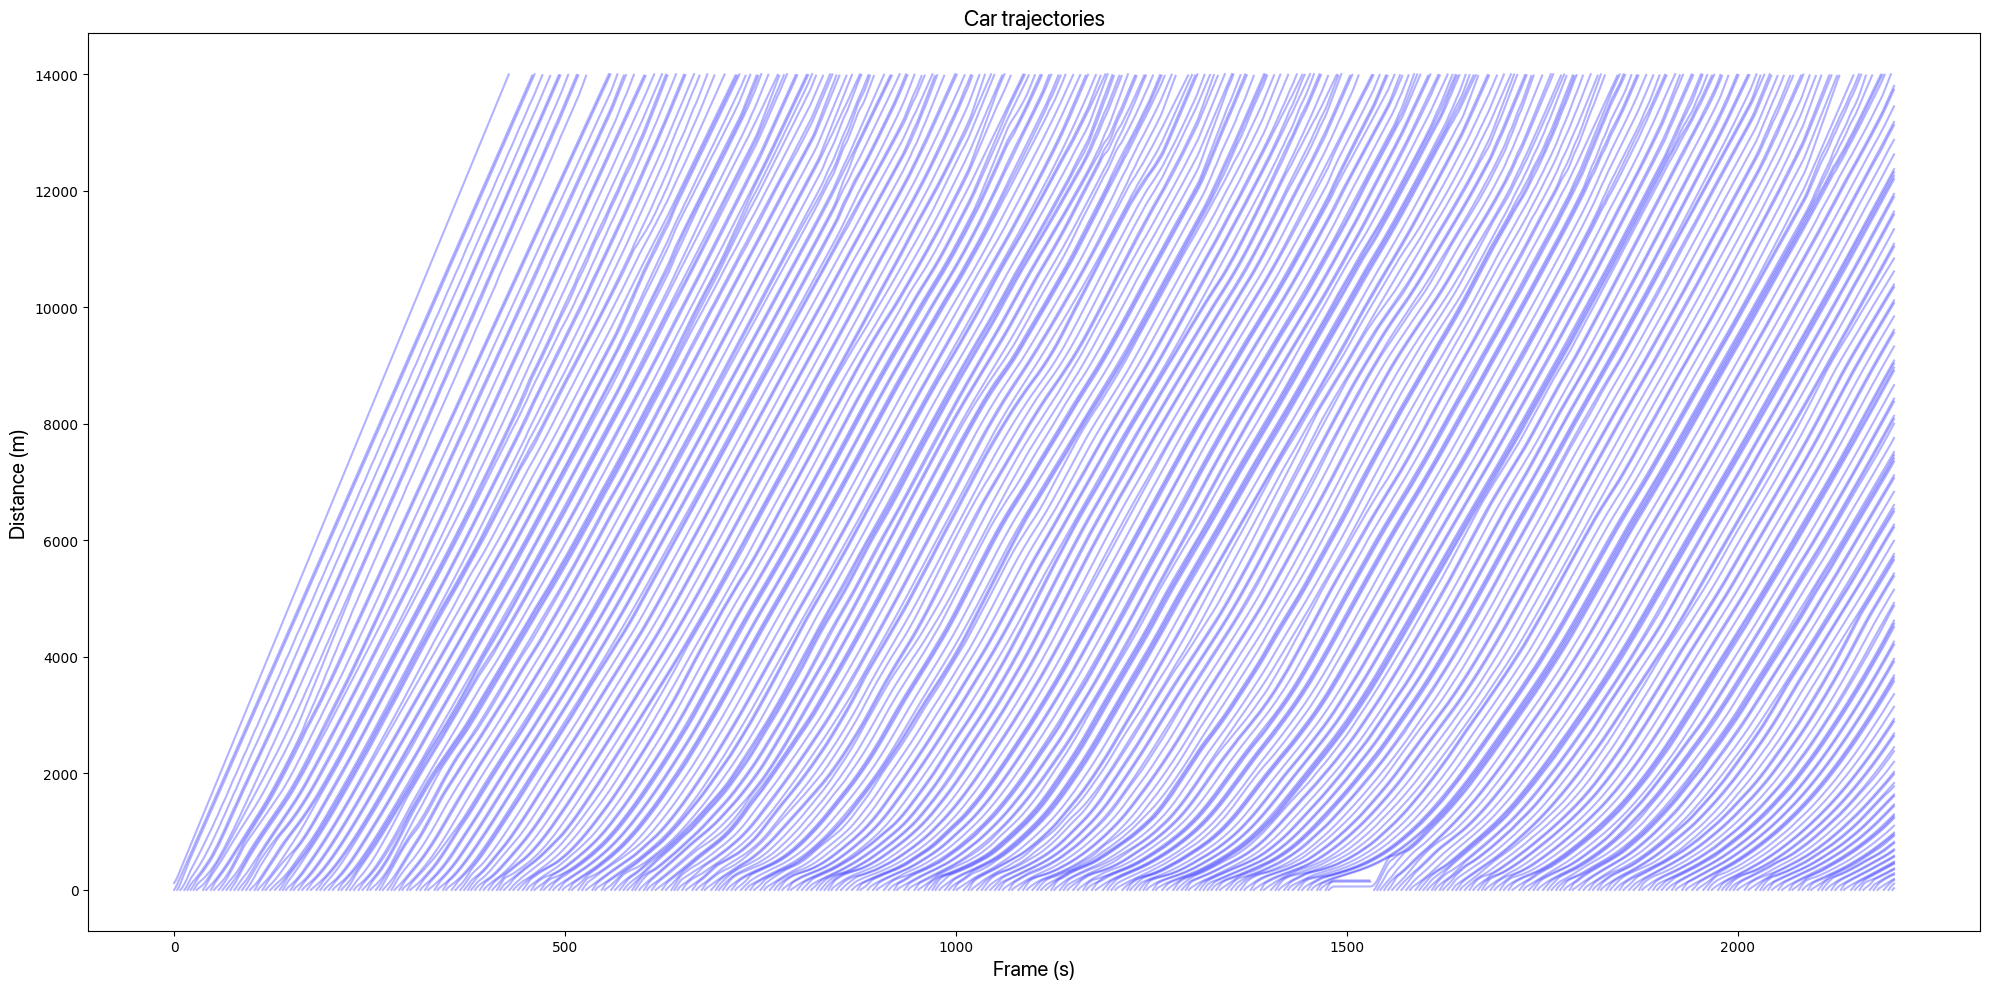

In [158]:
# Plot all car trajectories

fig, ax = plt.subplots(figsize=(20, 10))

#sns.scatterplot(data=cars_df, x='car_t_d', y='car_x', hue='car_id', ax=ax, s=10, color='blue')

cars_df.groupby('car_id').plot(x='frame', y='car_x', ax=ax, legend=False, alpha=0.3, color='blue')

ax.set_xlabel('Frame (s)', font="SF Pro Display", fontsize=15)
ax.set_ylabel('Distance (m)', font="SF Pro Display", fontsize=15)

ax.set_title(f'Car trajectories', font="SF Pro Display", fontsize=16)

fig.tight_layout()

# Transparent background
fig.patch.set_alpha(0)

fig.savefig('plots/car_trajectories_absolute.png', dpi=300, transparent=True)

In [159]:
exits_df.head()

,frame,car_id,avg_v,avg_a,t_d
